In [45]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import hvplot.pandas
import plotly.express as px
from sklearn.cluster import KMeans

In [14]:
recipes_df = pd.read_csv('Master10000_only_seasonings_cleaned.csv', index_col=[0])
recipes_df

,cuisine_SP,onion,garliclemon,parsley,cinnamon,ginger,lime,vinegar,thyme,basil,...,rose water,pico de gallo,chili garlic sauce,file powder,kefir,harissa,tamarind pulp,savory,baharat,douchi
0,[],0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,[],0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,[],1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,[],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
recipes_df.cuisine_SP.value_counts()

[]                                                7037
['American']                                       712
['Mediterranean', 'Italian', 'European']           440
['Mexican']                                        394
['Southern']                                       330
['Indian', 'Asian']                                177
['Chinese', 'Asian']                               164
['Mediterranean', 'French', 'European']            141
['Mediterranean', 'European', 'Greek']              69
['Creole', 'Cajun']                                 63
['European', 'Irish']                               62
['English', 'Scottish', 'British', 'European']      54
['Asian']                                           51
['Vietnamese', 'Asian']                             47
['Middle Eastern']                                  44
['German', 'European']                              37
['Korean', 'Asian']                                 31
['Spanish', 'European']                             25
['Eastern 

In [12]:
encoding_df = pd.read_csv('Random_forests_models/cuisine_encoding_dict.csv', index_col=[0])

In [13]:
encoding_df

,African,American,Asian,Creole,English,European,French,Greek,Indian,Irish,Italian,Mexican,Middle Eastern,Southern,Spanish
encoded,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14


In [17]:
spices_no_cuisine_name = recipes_df.drop('cuisine_SP', axis=1)

In [18]:
spices_no_cuisine_name

,onion,garliclemon,parsley,cinnamon,ginger,lime,vinegar,thyme,basil,fresh pepper,...,rose water,pico de gallo,chili garlic sauce,file powder,kefir,harissa,tamarind pulp,savory,baharat,douchi
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Perform PCA to see if there is a natural clustering

In [37]:
component_analyses = PCA(n_components = 3).fit_transform(spices_no_cuisine_name)

In [38]:
component_analyses

array([[-0.70683055,  1.5515177 ,  0.80168951],
       [-0.58451454, -0.19993374, -0.16975871],
       [-0.3355804 ,  0.11844401, -0.4034503 ],
       ...,
       [-0.61809556, -0.18245571, -0.15566931],
       [-0.58451454, -0.19993374, -0.16975871],
       [ 1.27800236, -0.73462999,  0.54376051]])

In [39]:
spices_no_cuisine_name['component_1'] = component_analyses[:,0]
spices_no_cuisine_name['component_2'] = component_analyses[:,1]
spices_no_cuisine_name['component_3'] = component_analyses[:,2]
spices_no_cuisine_name

,onion,garliclemon,parsley,cinnamon,ginger,lime,vinegar,thyme,basil,fresh pepper,...,file powder,kefir,harissa,tamarind pulp,savory,baharat,douchi,component_1,component_2,component_3
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.706831,1.551518,0.801690
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.584515,-0.199934,-0.169759
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.335580,0.118444,-0.403450
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,-0.045103,-0.772348,0.105365
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.601522,-0.934091,0.748881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.584515,-0.199934,-0.169759
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.683229,0.163187,0.153754
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.618096,-0.182456,-0.155669
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,-0.584515,-0.199934,-0.169759


In [41]:
fig = px.scatter_3d(spices_no_cuisine_name, x='component_1', y='component_2',z='component_3', width = 800)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

In [42]:
X_for_KMeans = spices_no_cuisine_name[['component_1','component_2','component_3']]

In [43]:
X_for_KMeans

,component_1,component_2,component_3
0,-0.706831,1.551518,0.801690
1,-0.584515,-0.199934,-0.169759
2,-0.335580,0.118444,-0.403450
3,-0.045103,-0.772348,0.105365
4,1.601522,-0.934091,0.748881
...,...,...,...
9995,-0.584515,-0.199934,-0.169759
9996,-0.683229,0.163187,0.153754
9997,-0.618096,-0.182456,-0.155669
9998,-0.584515,-0.199934,-0.169759


In [46]:
inertias = []
for k in range (2,10):
    kmeans_model = KMeans(n_clusters = k, random_state=42)
    kmeans_model.fit(X_for_KMeans)
    classes = kmeans_model.predict(X_for_KMeans)
    inertias.append([k,kmeans_model.inertia_])
inertias

[[2, 6320.097860072834],
 [3, 4112.212297617361],
 [4, 2921.3437283424105],
 [5, 2353.0729797208687],
 [6, 1869.4451816812261],
 [7, 1601.2948916485211],
 [8, 1279.2418863005792],
 [9, 1067.1855917910132]]

In [48]:
inertias_df = pd.DataFrame(inertias, columns=['k','inertia'])
inertias_df

,k,inertia
0,2,6320.097860
1,3,4112.212298
2,4,2921.343728
3,5,2353.072980
4,6,1869.445182
5,7,1601.294892
6,8,1279.241886
7,9,1067.185592


<AxesSubplot:xlabel='k'>

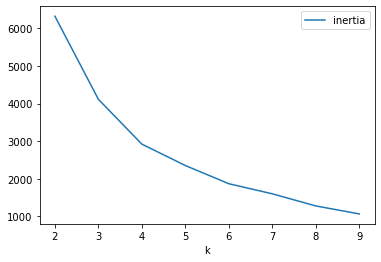

In [50]:
inertias_df.plot(x='k', y='inertia')

In [52]:
kmeans_model_6 = KMeans(n_clusters=6, random_state=42)
kmeans_model_6.fit(X_for_KMeans)
predicted_class = kmeans_model_6.predict(X_for_KMeans)
predicted_class

array([4, 2, 2, ..., 2, 2, 5])

In [53]:
spices_no_cuisine_name['classes'] = predicted_class
spices_no_cuisine_name

,onion,garliclemon,parsley,cinnamon,ginger,lime,vinegar,thyme,basil,fresh pepper,...,kefir,harissa,tamarind pulp,savory,baharat,douchi,component_1,component_2,component_3,classes
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.706831,1.551518,0.801690,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.584515,-0.199934,-0.169759,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.335580,0.118444,-0.403450,2
3,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,-0.045103,-0.772348,0.105365,1
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.601522,-0.934091,0.748881,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.584515,-0.199934,-0.169759,2
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.683229,0.163187,0.153754,2
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.618096,-0.182456,-0.155669,2
9998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-0.584515,-0.199934,-0.169759,2


In [55]:
spices_no_cuisine_name.to_csv('spices_only_kmeans/10000_ingredients_PCA_3_kmeans_6_clusters.csv')